<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  215 non-null    float64
 1   Review  66 non-null     object 
dtypes: float64(1), object(1)
memory usage: 3.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 2 to 225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  66 non-null     float64
 1   Review  66 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


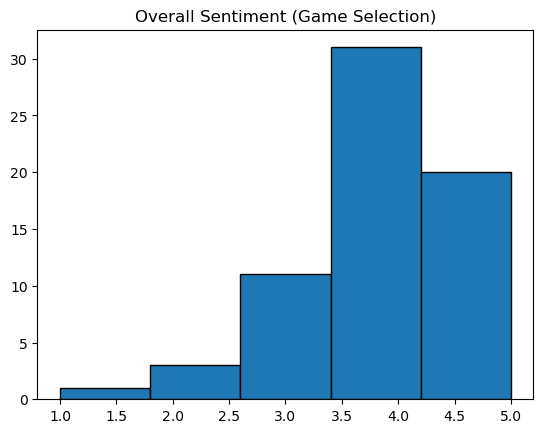

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rhseb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rhseb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[('would', 19), ('titles', 16), ('games', 16), ('like', 13), ('see', 11)]


,Rating,Review,Tokens,Filtered_Tokens,Lemmatized_Tokens,TFIDF_Tokens
2,2.0,lack of titles,"[lack, of, titles]","[lack, titles]","[lack, title]",lack title
4,1.0,add apex also quidditch champions when it rele...,"[add, apex, also, quidditch, champions, when, ...","[add, apex, also, quidditch, champions, releas...","[add, apex, also, quidditch, champion, release...",add apex also quidditch champion release alpha...
5,4.0,more titles would be great,"[more, titles, would, be, great]","[titles, would, great]","[title, would, great]",title would great
9,4.0,i think necc has a healthy selection of games ...,"[i, think, necc, has, a, healthy, selection, o...","[think, necc, healthy, selection, games, seek,...","[think, necc, healthy, selection, game, seek, ...",think necc healthy selection game seek ensure ...
11,4.0,add singles titles like madden smash fifa,"[add, singles, titles, like, madden, smash, fifa]","[add, singles, titles, like, madden, smash, fifa]","[add, single, title, like, madden, smash, fifa]",add single title like madden smash fifa
13,4.0,you offer almost all titles we have in the pro...,"[you, offer, almost, all, titles, we, have, in...","[offer, almost, titles, program]","[offer, almost, title, program]",offer almost title program
19,5.0,cover all the important titles in my opinion,"[cover, all, the, important, titles, in, my, o...","[cover, important, titles, opinion]","[cover, important, title, opinion]",cover important title opinion
23,5.0,games are selected well only addition i think ...,"[games, are, selected, well, only, addition, i...","[games, selected, well, addition, think, made,...","[game, select, well, addition, think, make, ma...",game select well addition think make mario kar...
24,4.0,more is better,"[more, is, better]",[better],[better],better
25,4.0,offering lol in spring was huge,"[offering, lol, in, spring, was, huge]","[offering, lol, spring, huge]","[offer, lol, spring, huge]",offer lol spring huge


In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

#Loading The Dataset
df = pd.read_csv('NECC Game Selection.csv')

#Seeing The Data
df.head(10)

#Basic EDA
df.info()

#Identifying Null Reviews
df.isnull().sum()

#Removing Null Reviews
df = df.dropna(subset=['Review'])
df.info()

#Showing The Overall Sentiment
x = df['Rating']
plt.hist(x, bins=5, edgecolor='black')
plt.title("Overall Sentiment (Game Selection)")
plt.show()

#Removing Stop Words
def clean_text(text):
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text) 
    text = re.sub(r'[^a-zA-Z\s]', ' ', text) 
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

df['Review'] = df['Review'].apply(clean_text)

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('wordnet')

def tokenize_text(text):
    tokens = word_tokenize(text) 
    return tokens  

df['Tokens'] = df['Review'].apply(tokenize_text)

from nltk.corpus import stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

df['Filtered_Tokens'] = df['Tokens'].apply(remove_stopwords)

from collections import Counter 
all_filtered_tokens = [word for tokens in df['Filtered_Tokens'] for word in tokens]
word_counts_after_removal = Counter(all_filtered_tokens)
most_common_words_after_removal = word_counts_after_removal.most_common(5)
print(most_common_words_after_removal)

from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word, pos='v') for word in tokens]

df['Lemmatized_Tokens'] = df['Filtered_Tokens'].apply(lemmatize_tokens)

from sklearn.feature_extraction.text import TfidfVectorizer

#performing TF-IDF vectorization
def apply_tfidf(df):
    df['TFIDF_Tokens'] = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['TFIDF_Tokens'])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names

# Applying TF-IDF on our Dataframe
tfidf_matrix, feature_names = apply_tfidf(df)
df.head(10)